In [1]:
import torch
import numpy as np
import napari


c:\Users\vegaarellano\Anaconda3\envs\python-pytorch-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
image_1 = np.random.rand(1,10,12,15)
print(image_1.shape)

image_2 = np.random.rand(1,10,12,20)
print(image_2.shape)

image_3 = np.concatenate([image_1, image_2], axis=3)
print(image_3.shape)

In [2]:
viewer = napari.Viewer()

In [ ]:
#viewer.add_image(np.transpose(image_1, axes=[2,0,1]), name="Original")
viewer.add_image(np.transpose(image_1, axes=[2,0,1,3]), name="1")
viewer.add_image(np.transpose(image_2, axes=[2,0,1,3]), name="2")
viewer.add_image(np.transpose(image_3, axes=[0,1,2,3]), name="3")

In [4]:
viewer = napari.Viewer()

In [ ]:
napari.run()

In [1]:

from unicodedata import name
import matplotlib.pyplot as plt
from sqlalchemy import false
from torch import nn, unsqueeze
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms
from torchvision.models.detection.mask_rcnn import maskrcnn_resnet50_fpn
import torchvision
import nibabel as nib
import napari
import os
#from vnet.vnet import VNet
#from vnet.transformations import ResizeImage
import random
from datetime import date
from collections import OrderedDict

c:\Users\vegaarellano\Anaconda3\envs\python-pytorch-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load images and analize their values
# 256x256 => 512x512
import torch.nn as nn
import torch
from torch import autograd

class one_step_conv(nn.Module):
    """ Network with 5 layers of depth appying 1 convolution """
    def __init__(self, in_ch, out_ch):
        super(one_step_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        conv = self.conv(x)
        print(f"Shape for internal conv {conv.shape}")
        return conv

torch.Size([1, 1, 180, 180])
Shape for internal conv torch.Size([1, 1, 180, 180])
torch.Size([1, 1, 180, 180])


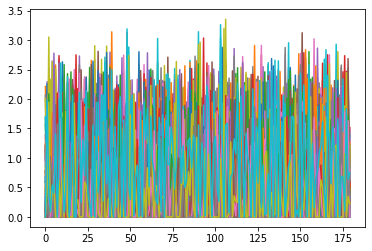

In [5]:
n = 180
x = torch.rand((1,1,n,n))
y = torch.rand(1,1,n,n)
print(x.shape)
model = one_step_conv(in_ch=1, out_ch=1)
pred = model(x)
print(pred.shape)
plt.plot(pred[0,0,:,:].detach().numpy())
plt.show()
plt.close()

In [136]:
import torch.nn as nn
import torch
from torch import autograd
#network with 3 conv-and-deconv steps used in paper

     


class UnetExample(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(UnetExample, self).__init__()
        # Downsampling        
        self.conv_down_1 = one_step_conv(1, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.conv_down_2 = one_step_conv(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.conv_down_3 = one_step_conv(128, 256)
        self.pool3 = nn.MaxPool2d(2)
        self.conv_down_4 = one_step_conv(256, 512)
        self.pool4 = nn.MaxPool2d(2)
        self.conv_down_5 = one_step_conv(512, 1024)
        self.pool5 = nn.MaxPool2d(2)
        
        self.conv_bottom = one_step_conv(1024, 2048)
        
        # Upsampling        
        self.upsample_1 = nn.ConvTranspose2d(2048, 1024, 2, stride=2)
        self.conv_up_1 = one_step_conv(2048, 1024)
        self.upsample_2 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.conv_up_2 = one_step_conv(1024, 512)
        self.upsample_3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.conv_up_3 = one_step_conv(512, 256)
        self.upsample_4 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.conv_up_4 = one_step_conv(256, 128)
        self.upsample_5 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.conv_up_5 = one_step_conv(128, 64)

        self.conv_out = nn.Conv2d(64, 1, 1)

    def forward(self, x):
        ###down########
        down_1 = self.conv_down_1(x)
        pool_1 = self.pool1(down_1)
        print(f"down_1 : {down_1.shape} pool_1: {pool_1.shape}")

        down_2 = self.conv_down_2(pool_1)
        pool_2 = self.pool2(down_2)
        print(f"down_2 : {down_2.shape} pool_2: {pool_2.shape}")

        down_3 = self.conv_down_3(pool_2)
        pool_3 = self.pool3(down_3)
        print(f"down_3 : {down_3.shape} pool_3: {pool_3.shape}")

        down_4 = self.conv_down_4(pool_3)
        pool_4 = self.pool4(down_4)
        print(f"down_4 : {down_4.shape} pool_4: {pool_4.shape}")

        down_5 = self.conv_down_5(pool_4)
        pool_5 = self.pool5(down_5)
        print(f"down_5 : {down_5.shape} pool_5: {pool_5.shape}")

        bottom = self.conv_bottom(pool_5)
        print(f"bottom : {bottom.shape}")

        up_1 = self.upsample_1(bottom)
        merge1 = torch.cat([up_1, down_5], dim=1)
        up_1_out = self.conv_up_1(merge1)
        print(f"up_1 : {up_1.shape} merge1: {merge1.shape} up_1_out: {up_1_out.shape}")

        up_2 = self.upsample_2(up_1_out)
        merge2 = torch.cat([up_2, down_4], dim=1)
        up_2_out = self.conv_up_2(merge2)
        print(f"up_2 : {up_2.shape} merge2: {merge2.shape} up_2_out: {up_2_out.shape}")

        up_3 = self.upsample_3(up_2_out)
        merge3 = torch.cat([up_3, down_3], dim=1)
        up_3_out = self.conv_up_3(merge3)
        print(f"up_3 : {up_3.shape} merge3: {merge3.shape} up_3_out: {up_3_out.shape}")

        up_4 = self.upsample_4(up_3_out)        
        merge4 = torch.cat([up_4, down_2], dim=1)        
        up_4_out = self.conv_up_4(merge4)
        print(f"up_4 : {up_4.shape} merge4: {merge4.shape} up_4_out: {up_4_out.shape}")

        up_5 = self.upsample_5(up_4_out)
        merge5 = torch.cat([up_5, down_1], dim=1)
        up_5_out = self.conv_up_5(merge5)
        print(f"up_5 : {up_5.shape} merge5: {merge5.shape} up_5_out: {up_5_out.shape}")

        end_out = self.conv_out(up_5_out)
        #out = nn.Sigmoid()(end_out)
        #out = nn.Sigmoid(end_out)

        return end_out


In [141]:
n = 512
x = torch.rand((1,1,n,n))
y = torch.rand(1,1,n,n)

model = UnetExample(in_ch=1, out_ch=1)
pred = model(x)
print(pred.shape)

Shape for internal conv torch.Size([1, 64, 512, 512])
down_1 : torch.Size([1, 64, 512, 512]) pool_1: torch.Size([1, 64, 256, 256])
Shape for internal conv torch.Size([1, 128, 256, 256])
down_2 : torch.Size([1, 128, 256, 256]) pool_2: torch.Size([1, 128, 128, 128])
Shape for internal conv torch.Size([1, 256, 128, 128])
down_3 : torch.Size([1, 256, 128, 128]) pool_3: torch.Size([1, 256, 64, 64])
Shape for internal conv torch.Size([1, 512, 64, 64])
down_4 : torch.Size([1, 512, 64, 64]) pool_4: torch.Size([1, 512, 32, 32])
Shape for internal conv torch.Size([1, 1024, 32, 32])
down_5 : torch.Size([1, 1024, 32, 32]) pool_5: torch.Size([1, 1024, 16, 16])
Shape for internal conv torch.Size([1, 2048, 16, 16])
bottom : torch.Size([1, 2048, 16, 16])
Shape for internal conv torch.Size([1, 1024, 32, 32])
up_1 : torch.Size([1, 1024, 32, 32]) merge1: torch.Size([1, 2048, 32, 32]) up_1_out: torch.Size([1, 1024, 32, 32])
Shape for internal conv torch.Size([1, 512, 64, 64])
up_2 : torch.Size([1, 512, 64

In [111]:
n = 256
x = torch.rand((1,1,n,n))
y = torch.rand(1,1,n,n)

model = one_step_conv(in_ch=1, out_ch=1)
pred = model(x)
print(pred.shape)


Shape for internal conv torch.Size([1, 1, 253, 253])
torch.Size([1, 1, 253, 253])


In [ ]:
print("Downsampling:")
num = 64
depth = 5
input = 1
for i in range(depth):
    print(f"i {i} - input: {input} & output: {num * (2**i)}")
    input = num * (2**i)

print("Upsampling:")
for j in reversed(range(depth-1)):
    output = int(input/2)
    print(f"j: {j} - input: {input} & output: {output}")
    input /= 2
    input = int(input)

In [ ]:
class test_cnn(nn.Module):
    """ Network with 5 layers of depth appying 1 convolution """
    def __init__(self, in_ch, out_ch):
        super(test_cnn, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=5, padding=2),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.conv(x)

x = torch.randn((1,1,256,256))
print(x.shape)
test = test_cnn(1,1)
pred = test(x)
print(pred.shape)

In [ ]:
x = torch.randn((1,1,25,25))
x = x.view(-1)
np.random.seed(10)
data = np.random.normal(100, 20, 25)
print(len(x))
fig = plt.figure(figsize =(10, 7))
plt.boxplot(x.numpy())
plt.savefig('plots/stroke/boxplot.png')
plt.show()
plt.close()

In [1]:
import napari
import nibabel as nib
import numpy as np
viewer = napari.Viewer()
#viewer.close()

In [2]:


# Display the original image
original = "../dataset/train/images/sub-r001s001_ses-1_T1w.nii.gz"
mask="../dataset/train/masks/sub-r001s001_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz"
prediction="predictions/result_1_2022-04-26.nii"

test_load = nib.load(mask)
#test_load = nib.load(original)
input_image = test_load.get_fdata() # last dimension is depth
viewer.add_image(np.transpose(input_image, axes=[2,0,1]), name="Mask")
input_image = np.transpose(input_image, (0,1,2))

#viewer.add_image(image[0,:,:,:].numpy(), name="original")

#napari.run()

In [34]:
# Load sample data from the ISLES Challenge 2018
# Display the original image
import os
folder_path = "../dataProcessing/Results/sample/"
# images = [
#     "../dataProcessing/Results/sample/CT_4DPWI_345561.nii", # (256, 256, 8, 49)
#     "../dataProcessing/Results/sample/CT_345562.nii",       # (256, 256, 8)
#     "../dataProcessing/Results/sample/CT_CBF_345563.nii",   # (256, 256, 8)
#     "../dataProcessing/Results/sample/CT_MTT_345565.nii",   # (256, 256, 8)
#     "../dataProcessing/Results/sample/CT_CBV_345564.nii",   # (256, 256, 8)
#     "../dataProcessing/Results/sample/CT_Tmax_345567.nii",  # (256, 256, 8)
#     "../dataProcessing/Results/sample/OT_345566.nii"        # (256, 256, 8)
# ]

for file in os.listdir(folder_path):
    if ".nii" in file and "SMIR" in file:
        name_file = file.replace(".nii","")
        file_path = f"{folder_path}{file}"
        test_load = nib.load(file_path)
        #test_load = nib.load(original)
        input_image = test_load.get_fdata() # last dimension is depth
        print(input_image.shape)
        if len(input_image.shape) == 3:# and "OT" in name_file:            
            pass
            #viewer.add_image(np.transpose(input_image, axes=[2,0,1]), name=name_file)
        else:
            #for i in range(0,input_image.shape[-1]):
            #    viewer.add_image(np.transpose(input_image[:,:,:,i], axes=[2,0,1]), name=name_file)
            
            viewer.add_image(np.transpose(input_image[:,:,:,0], axes=[2,0,1]), name=name_file)
        
    #input_image = np.transpose(input_image, (0,1,2))


(256, 256, 8)
(256, 256, 8, 49)
(256, 256, 8)
(256, 256, 8)
(256, 256, 8)
(256, 256, 8)
(256, 256, 8)


In [10]:
print(viewer.layers[0].gamma) # 1
print(viewer.layers[0].opacity) # 1
print(viewer.layers[0].contrast_limits) # [0.0,13680.0]



1
1.0
[0.0, 13680.0]


In [12]:
w = h = 10
x1 = random.randint(0, w)
y1 = random.randint(0, h)
print(x1,y1)

6 8


In [ ]:
from napari.settings import get_settings
import time
import napari
from napari._qt.qthreading import thread_worker
from skimage import data
from skimage.morphology import ball, octahedron
import matplotlib.pyplot as plt

def make_screenshot(viewer):
    img = viewer.screenshot(canvas_only=True, flash=False)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
myblob = data.binary_blobs(
    length=200, volume_fraction=0.1, blob_size_fraction=0.3, n_dim=3, seed=42
)
myoctahedron = octahedron(100)
myball = ball(100)

# store the variables in a dict with the image name as key.
data_dict = {
    "blob": myblob,
    "ball": myball,
    "octahedron": myoctahedron,
}

In [ ]:
#viewer = napari.Viewer()
#viewer.window.resize(900, 600)

#viewer.theme = "dark"
# viewer.dims.ndisplay = 3
# viewer.axes.visible = True
# viewer.axes.colored = False
# viewer.axes.labels = False
# viewer.text_overlay.visible = True
# viewer.text_overlay.text = "Hello World!"

# Not yet implemented, but can be added as soon as this feature exisits (syntax might change): 
# viewer.controls.visible = False

# viewer.add_labels(myball, name="result" , opacity=1)
# viewer.camera.angles = (19, -33, -121)
# viewer.camera.zoom = 1.3

In [ ]:
@thread_worker
def loop_run():
    for image_name in data_dict: 
        time.sleep(0.5)
        image_data = data_dict[image_name]
        yield (image_data, image_name)

def update_layer(image_text_tuple):
    image, text = image_text_tuple
    viewer.layers["result"].data = image
    viewer.text_overlay.text = text
    make_screenshot(viewer)

In [ ]:
worker = loop_run()
worker.yielded.connect(update_layer)
worker.start()

In [ ]:
#img = viewer.layers["Original"].data
img = viewer.screenshot(path="dataprocessing/Stroke/Test.tiff", canvas_only=True, flash=False)
plt.imshow(img)
plt.axis("off")
plt.show()



In [ ]:
# Display the original image
original = "dataset/train/images/sub-r001s002_ses-1_T1w.nii.gz"
mask="dataset/train/masks/sub-r001s002_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz"
prediction="predictions/result_1_2022-04-26.nii"

test_load = nib.load(original)
#test_load = nib.load(original)
input_image = test_load.get_fdata() # last dimension is depth
viewer.add_image(np.transpose(input_image, axes=[2,0,1]), name="Original")
input_image = np.transpose(input_image, (0,1,2))

# Starts the image on napari
viewer.dims.set_current_step(0,0)

print(input_image.shape[2])
for i in range(input_image.shape[2]):
    # save screenshot and update the scroll
    img = viewer.screenshot(path=f"dataprocessing/Stroke/image_{i}.tiff", canvas_only=True, flash=False)
    # plt.imshow(img)
    # plt.axis("off")
    # plt.show()
    #time.sleep(0.5)
    viewer.dims.set_current_step(0,i)
    #plt.close()
viewer.layers.pop()
# print(viewer.layers[0].opacity)
# print(viewer.layers[0].contrast_limits)
# print(viewer.layers[0].gamma)
# #print(viewer.layers[0].colormap)
# print(viewer.layers[0].data.shape)
# print(viewer.dims.last_used)
# print(viewer.dims.current_step)
# # move image in cursor
# print(viewer.dims.set_current_step(0,60))



In [6]:
target = torch.ones([1,1,224,224], dtype=torch.float32)  # 64 classes, batch size = 10
output = torch.full([1,1,224,224], 1.5)  # A prediction (logit)
pos_weight = torch.ones([224])  # All weights are equal to 1
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
criterion(output, target)  # -log(sigmoid(1.5))

tensor(0.2014)

with Image.open("dataset/validation/") as img:
    pass

In [ ]:
# importing the module
import tracemalloc
 
import time


# instantiating the decorator
#@profile
def list_files(directory):    
    for dirpath, dirnames, filenames in os.walk(directory):
        for dir in dirnames:
            print(dir)
            for file in os.listdir(f"{dirpath}{dir}"):            
                if ".tiff" in file:
                    masks_folder = f"{dirpath}{dir}_mask/{file}".replace("images","masks")
                    img_folder = f"{dirpath}{dir}/{file}"
                    yield img_folder, masks_folder
                    
# starting the monitoring
tracemalloc.start()
# instantiating the decorator
start = time.time()
images = []
masks= []

for dirpath, dirnames, filenames in os.walk("dataset/train/images/"):
    for dir in dirnames:
        print(dir)
        for file in os.listdir(f"{dirpath}{dir}"):            
            if ".tiff" in file:
                masks_folder = f"{dirpath}{dir}_mask/{file}".replace("images","masks")
                img_folder = f"{dirpath}{dir}/{file}"
                images.append(img_folder)
                masks.append(masks_folder)


# for x,y in list_files("dataset/train/images/"):    
#     images.append(x)
#     masks.append(y)
print(len(images))
end = time.time()
print(end - start)
#0.006002664566040039 & (337519, 378534)
#0.003056049346923828 & (200926, 230068)

# displaying the memory
print(tracemalloc.get_traced_memory())
 
# stopping the library
tracemalloc.stop()



In [ ]:
# Create histograms of the first image
plt.hist(input_image[:,:,0].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')


In [ ]:
input_image[64].shape
#napari.run()

In [ ]:
# Replicating the sliding window part

# original = "dataset/train/images/sub-r001s004_ses-1_T1w.nii.gz"
# mask="dataset/train/masks/sub-r001s004_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz"
# prediction="predictions/result_3_2022-04-26.nii"

# original = "dataset/train/images/sub-r001s003_ses-1_T1w.nii.gz"
# mask="dataset/train/masks/sub-r001s003_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz"
# prediction="predictions/result_2_2022-04-26.nii"

original = "dataset/train/images/sub-r001s002_ses-1_T1w.nii.gz"
mask="dataset/train/masks/sub-r001s002_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz"
prediction="predictions/result_1_2022-04-26.nii"

# Read one image
test_load = nib.load(mask)
input_image = test_load.get_fdata() # 2,0,1
viewer.add_image(np.transpose(input_image, axes=[2,0,1]), name="Mask")
# (174, 227, 155) => H, W, D
print(input_image.shape)
input_image = torch.from_numpy(input_image) # => D, W, H

In [ ]:
img = viewer.screenshot(canvas_only=True, flash=False)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
import math
# Read sequences of 32
# resize images through depths
# (174, 227, 155) => H, W, D
n = 32
image = torch.unsqueeze(input_image, dim=0)
 # B, D, H, W => (1, 155, 174, 227)
trans_test = ResizeImage(128)



In [ ]:
number = image.shape[3]
print(f"Division: {number} / {n}  = {number / n}")
print(f"Division: Round({number} / {n})  = {round(number / n)}")
print(f"Residual: {number} % {n} = {number % n}")
#print(f"Residual Condition: {number} % {n} = {(number % n) / 2}")
print(f"Possible Window Size: {n / 2} ")

if round(number / n) < number / n:
    if number % n > n / 2: 
        result = round(number / n) + 1
else: 
    result = round(number / n)
print(f"Print Condition: {result}")

In [ ]:
# start offsets
start_offset = 0
end_offset = n
# determine number of iterations to get data
if round(image.shape[3] / n) < image.shape[3] / n:
    if image.shape[3] % n > n / 2: 
        iterations = round(image.shape[3] / n) + 1
else: 
    iterations = round(image.shape[3] / n)
print(f"Print Condition: {image.shape[3]} / {n} = {image.shape[3] / n}")
print(f"Total iterations {iterations} due to residual {image.shape[3] % n} that is {n/2}")

for i in range(0,iterations):
    print(f"{i+1} New values: start {start_offset} end {end_offset} | {i *n} / {image.shape[3]}")    
    if end_offset > image.shape[3]:    
        print(f"Let's add {end_offset - image.shape[3]} padding to the model")
        temp = torch.concat([image[:, :, :, start_offset:end_offset], torch.zeros((image.shape[0],image.shape[1],image.shape[2], end_offset - image.shape[3] ))], dim=3)        
    else:
        temp = image[:, :, :, start_offset:end_offset]
    print(temp.shape)
    # Update offsets    
    start_offset += n
    end_offset += n
    

# # Concatenate all images and add batch dimension
# final_input_img = torch.concat(new_img, dim=0)
# final_maks_img = torch.concat(mask_new, dim=0)
# final_input_img = torch.unsqueeze(final_input_img, dim=0)
# final_maks_img = torch.unsqueeze(final_maks_img, dim=0)

In [ ]:
print(167%32)
print(167/32)

In [ ]:
dir = "dataset/train/images/sub-r001s001_ses-1_T1w/"
last_file_name = int(sorted(os.listdir(dir))[-1].replace(".tiff",""))


In [ ]:
#print(f"{dir}/{str(last_file_name+1).zfill(4)}.tiff")
181
num= 200
print(num%32)
for i in range(num%32):
    print(i+1)

In [ ]:
n = 32
number = 181
print(number)
print(number/n)
print(number%n)
print(n - number%n)
((number + (n - number%n)))%32

In [ ]:
for i in range(1,11):
    print(32*i)

In [ ]:
""" ========= Testing IoU and dice score ========== """
import math
from sklearn.metrics import jaccard_score
smooth = 1e-6
#torch.manual_seed(200)
y_pred = torch.randint(0,2,(1,10))
y_true = torch.randint(0,2,(1,10))
# y_pred = torch.zeros((1,10))
# y_true = torch.zeros((1,10))
# y_pred = torch.ones((1,10))
# y_true = torch.ones((1,10))
print(y_true)
print(y_pred)
iflat = y_true.view(-1)
tflat = y_pred.view(-1)
print(f"Jaccard Score: {jaccard_score(y_true=iflat, y_pred=tflat, average='binary')*100:.2f}%")

# intersection = (iflat * tflat).sum()
# union = iflat.sum() + tflat.sum() - intersection 
# iou = intersection / union
# if math.isnan(iou):
#     iou = 0
# dice_score = ((2. * intersection) / (iflat.sum() + tflat.sum()))
# if math.isnan(dice_score):
#     dice_score = 0
# print(f"iflat: {iflat} \n tflat: {tflat} \n intersection: {intersection:.2f} \n union: {union:.2f} \n IOU: {iou*100:.2f}% \n Dice Score: {dice_score*100:.2f}%")

In [57]:
for i in np.arange(0, 16, 5):
    print(i)

0
5
10
15


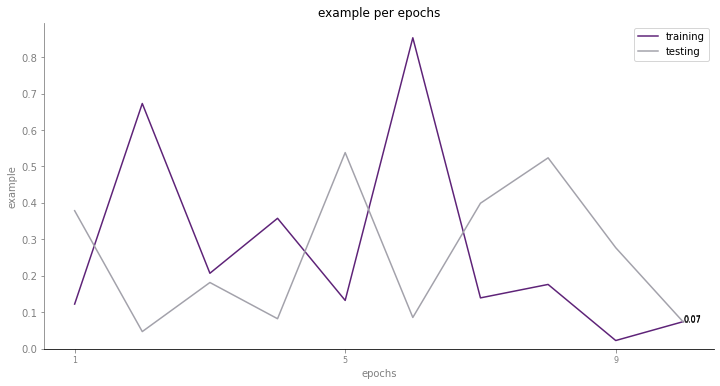

In [58]:
""" Plot values """
n = 10
values = torch.rand(n)
second_axes = torch.rand(n)
name = "example"
range_value = range(1,len(values)+1)
#title = f"{name} per epochs - {values[-1]:.2f} last element"
title = f"{name} per epochs"
#print(values)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(range_value, values, color="#5E2378")
ax.plot(range_value, second_axes, color="#A3A2AB")
ax.legend(["training", "testing"], loc=0, frameon=True)
ax.set(xlabel='epochs', ylabel=name,title=title)    
plt.xticks(range(1,len(values),4))
#plt.xticks(np.arange(1, len(values)+1, #4))
#plt.yticks(range_value)
ax.set_ylim(ymin=0)
#ax.set_xlim()
ax.xaxis.label.set_color('gray')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('gray')          #setting up Y-axis label color to blue
ax.tick_params(axis='x', colors='gray', labelsize=8)   #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='gray')  #setting up Y-axis tick color to black
ax.spines['left'].set_color('gray')       # setting up Y-axis tick color to red
ax.spines['top'].set_color('gray')  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.annotate(f"{values[-1]:.2f}",(n,values[-1]), color='black', size=8)   
plt.annotate(f"{second_axes[-1]:.2f}",(n,second_axes[-1]), color='black', size=8)   
#plt.tick_params(top='off', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')
plt.show()
#plt.savefig(f'plots/test.png', format="png")
#plt.close(fig)

In [ ]:

class SegNet(nn.Module):
    def __init__(self,input_nbr,label_nbr):
        super(SegNet, self).__init__()

        batchNorm_momentum = 0.1

        self.conv11 = nn.Conv2d(input_nbr, 64, kernel_size=3, padding=1)
        self.bn11 = nn.BatchNorm2d(64, momentum= batchNorm_momentum)
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn12 = nn.BatchNorm2d(64, momentum= batchNorm_momentum)

        self.conv21 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn21 = nn.BatchNorm2d(128, momentum= batchNorm_momentum)
        self.conv22 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn22 = nn.BatchNorm2d(128, momentum= batchNorm_momentum)

        self.conv31 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn31 = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv32 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn32 = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv33 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn33 = nn.BatchNorm2d(256, momentum= batchNorm_momentum)

        self.conv41 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn41 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn42 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv43 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn43 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)

        self.conv51 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn51 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv52 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn52 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv53 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn53 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)

        self.conv53d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn53d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv52d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn52d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv51d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn51d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)

        self.conv43d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn43d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv42d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn42d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv41d = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.bn41d = nn.BatchNorm2d(256, momentum= batchNorm_momentum)

        self.conv33d = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn33d = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv32d = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn32d = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv31d = nn.Conv2d(256,  128, kernel_size=3, padding=1)
        self.bn31d = nn.BatchNorm2d(128, momentum= batchNorm_momentum)

        self.conv22d = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn22d = nn.BatchNorm2d(128, momentum= batchNorm_momentum)
        self.conv21d = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.bn21d = nn.BatchNorm2d(64, momentum= batchNorm_momentum)

        self.conv12d = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn12d = nn.BatchNorm2d(64, momentum= batchNorm_momentum)
        self.conv11d = nn.Conv2d(64, label_nbr, kernel_size=3, padding=1)


    def forward(self, x):

        # Stage 1
        x11 = F.relu(self.bn11(self.conv11(x)))
        x12 = F.relu(self.bn12(self.conv12(x11)))
        x1p, id1 = F.max_pool2d(x12,kernel_size=2, stride=2,return_indices=True)

        # Stage 2
        x21 = F.relu(self.bn21(self.conv21(x1p)))
        x22 = F.relu(self.bn22(self.conv22(x21)))
        x2p, id2 = F.max_pool2d(x22,kernel_size=2, stride=2,return_indices=True)

        # Stage 3
        x31 = F.relu(self.bn31(self.conv31(x2p)))
        x32 = F.relu(self.bn32(self.conv32(x31)))
        x33 = F.relu(self.bn33(self.conv33(x32)))
        x3p, id3 = F.max_pool2d(x33,kernel_size=2, stride=2,return_indices=True)

        # Stage 4
        x41 = F.relu(self.bn41(self.conv41(x3p)))
        x42 = F.relu(self.bn42(self.conv42(x41)))
        x43 = F.relu(self.bn43(self.conv43(x42)))
        x4p, id4 = F.max_pool2d(x43,kernel_size=2, stride=2,return_indices=True)

        # Stage 5
        x51 = F.relu(self.bn51(self.conv51(x4p)))
        x52 = F.relu(self.bn52(self.conv52(x51)))
        x53 = F.relu(self.bn53(self.conv53(x52)))
        x5p, id5 = F.max_pool2d(x53,kernel_size=2, stride=2,return_indices=True)


        # Stage 5d
        x5d = F.max_unpool2d(x5p, id5, kernel_size=2, stride=2)
        x53d = F.relu(self.bn53d(self.conv53d(x5d)))
        x52d = F.relu(self.bn52d(self.conv52d(x53d)))
        x51d = F.relu(self.bn51d(self.conv51d(x52d)))

        # Stage 4d
        x4d = F.max_unpool2d(x51d, id4, kernel_size=2, stride=2)
        x43d = F.relu(self.bn43d(self.conv43d(x4d)))
        x42d = F.relu(self.bn42d(self.conv42d(x43d)))
        x41d = F.relu(self.bn41d(self.conv41d(x42d)))

        # Stage 3d
        x3d = F.max_unpool2d(x41d, id3, kernel_size=2, stride=2)
        x33d = F.relu(self.bn33d(self.conv33d(x3d)))
        x32d = F.relu(self.bn32d(self.conv32d(x33d)))
        x31d = F.relu(self.bn31d(self.conv31d(x32d)))

        # Stage 2d
        x2d = F.max_unpool2d(x31d, id2, kernel_size=2, stride=2)
        x22d = F.relu(self.bn22d(self.conv22d(x2d)))
        x21d = F.relu(self.bn21d(self.conv21d(x22d)))

        # Stage 1d
        x1d = F.max_unpool2d(x21d, id1, kernel_size=2, stride=2)
        x12d = F.relu(self.bn12d(self.conv12d(x1d)))
        x11d = self.conv11d(x12d)

        return x11d


(626, 965)
13.718172358050733
10.76606797000447
82
0
After normalization
torch.Size([626, 965])
tensor(1.)
tensor(0.5244)
tensor(0.)


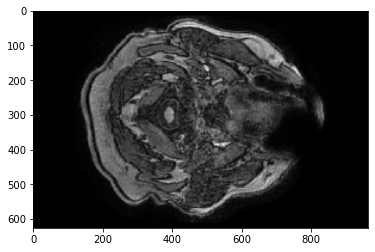

(626, 965)
13.718172358050733
10.76606797000447
82
0
After normalization
torch.Size([626, 965])
tensor(1.)
tensor(0.5244)
tensor(0.)


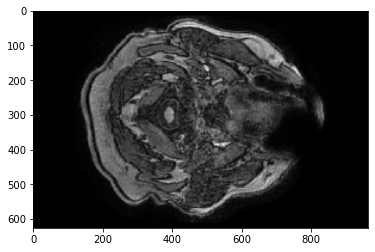

(626, 965)
13.718172358050733
10.76606797000447
82
0
After normalization
torch.Size([626, 965])
tensor(1.)
tensor(0.5244)
tensor(0.)


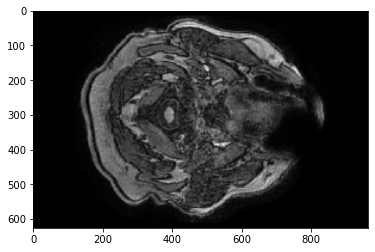

(626, 965)
13.718172358050733
10.76606797000447
82
0
After normalization
torch.Size([626, 965])
tensor(1.)
tensor(0.5244)
tensor(0.)


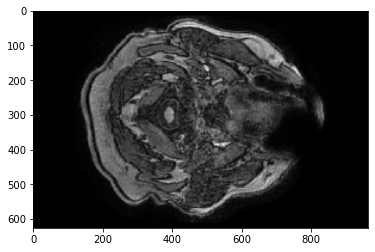

In [67]:


from PIL import Image
original = "../dataset/train/images/sub-r001s001_ses/0000.png"

images = [
    "../dataset/train/images/sub-r001s001_ses/0000.png",
    "../dataset/train/images/sub-r001s001_ses/0001.png",
    "../dataset/train/images/sub-r001s001_ses/0002.png",
    "../dataset/train/images/sub-r001s001_ses/0003.png"
]

for img in images:
    with Image.open(original).convert("L") as img_:
        img_out = np.array(img_)
        print(img_out.shape)
        print(np.std(img_out))
        print(np.mean(img_out))
        print(np.max(img_out))
        print(np.min(img_out))
        print("After normalization")
        temp = torch.from_numpy(img_out).float() / np.max(img_out)
        print(temp.shape)
        print(torch.max(temp))
        print(torch.max(temp[400,:]))
        print(torch.min(temp))
        
    plt.imshow(img_,cmap="gray")
    plt.show()
    plt.close()

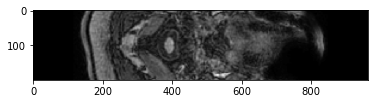

tensor(1.)
tensor(0.)
tensor(0.1578)
tensor(0.1558)


In [64]:
# Show a part of the entire image
subset = temp[200:400,:] / 81.
plt.imshow(subset, cmap="gray")
plt.show()
plt.close()
print(torch.max(subset))
print(torch.min(subset))
print(torch.mean(subset))
print(torch.std(subset))

In [ ]:
from napari.settings import get_settings
import time
import napari
from napari._qt.qthreading import thread_worker
from skimage import data
from skimage.morphology import ball, octahedron
import matplotlib.pyplot as plt

def make_screenshot(viewer):
    img = viewer.screenshot(canvas_only=True, flash=False)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
myblob = data.binary_blobs(
    length=200, volume_fraction=0.1, blob_size_fraction=0.3, n_dim=3, seed=42
)
myoctahedron = octahedron(100)
myball = ball(100)

# store the variables in a dict with the image name as key.
data_dict = {
    "blob": myblob,
    "ball": myball,
    "octahedron": myoctahedron,
}

In [ ]:
viewer = napari.Viewer()
viewer.window.resize(900, 600)

viewer.theme = "light"
viewer.dims.ndisplay = 3
viewer.axes.visible = True
viewer.axes.colored = False
viewer.axes.labels = False
viewer.text_overlay.visible = True
viewer.text_overlay.text = "Hello World!"

# Not yet implemented, but can be added as soon as this feature exisits (syntax might change): 
# viewer.controls.visible = False

viewer.add_labels(myball, name="result" , opacity=1)
viewer.camera.angles = (19, -33, -121)
viewer.camera.zoom = 1.3

In [ ]:
@thread_worker
def loop_run():
    for image_name in data_dict: 
        time.sleep(0.5)
        image_data = data_dict[image_name]
        yield (image_data, image_name)

def update_layer(image_text_tuple):
    image, text = image_text_tuple
    viewer.layers["result"].data = image
    viewer.text_overlay.text = text
    make_screenshot(viewer)

In [ ]:
worker = loop_run()
worker.yielded.connect(update_layer)
worker.start()

In [2]:
from PIL import Image
#path = "dataProcessing/Stroke/sub-r010s005_ses/0000.tiff"
path = "../dataset/train/images/sub-r001s001_ses/0000.png"
#path = "dataProcessing/Stroke/test.png"
with Image.open(path) as img:
    print(type(img))
    img = img.convert("RGB")
    img.show()

<class 'PIL.PngImagePlugin.PngImageFile'>


<class 'PIL.PngImagePlugin.PngImageFile'>
torch.Size([1, 256, 256])


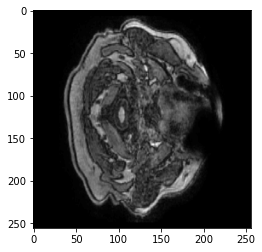

In [25]:
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
stroke_train_transformations = transforms.Compose(
        [
            #transforms.ToPILImage(),
            transforms.Grayscale(),
            transforms.GaussianBlur(kernel_size=(3,7), sigma=(0.1,2)), 
            transforms.Resize(size=(256,256)),            
            transforms.ToTensor(),
        ]
    )

from PIL import Image
#path = "dataProcessing/Stroke/sub-r010s005_ses/0000.tiff"
path = "../dataset/train/images/sub-r001s001_ses/0000.png"
#path = "dataProcessing/Stroke/test.png"
with Image.open(path) as img:
    print(type(img))
    #img = img.convert("RGB")
    img = stroke_train_transformations(img)
    print(img.shape)
    plt.imshow(img[0,:,:], cmap="gray")

<class 'PIL.PngImagePlugin.PngImageFile'>


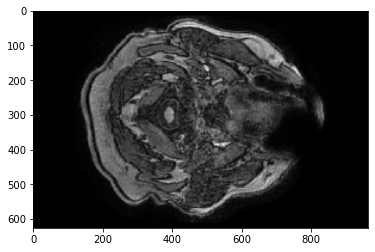

In [18]:
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

from PIL import Image
#path = "dataProcessing/Stroke/sub-r010s005_ses/0000.tiff"
path = "../dataset/train/images/sub-r001s001_ses/0000.png"
#path = "dataProcessing/Stroke/test.png"
with Image.open(path) as img:
    print(type(img))
    #img = img.convert("RGB")
    img =  transforms.ToTensor()(img)
    plt.imshow(img[0,:,:], cmap="gray")
    #img.show()

In [20]:
l = [{"name1": range(0,10)},{"name2": range(0,20)}]
for k in l:
    res = list(k.keys())[0]
    print(res)
    print(k[res])

name1
range(0, 10)
name2
range(0, 20)


In [7]:
torch.range(0,10)

C:\Users\vegaarellano\AppData\Local\Temp\ipykernel_16328\497691777.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.range(0,10)


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [1]:
# Calculate weights for two classes: Background and Foreground
import numpy as np
area = 224*224
segm = area*0.04
temp = np.array([area,segm])
summ = temp.sum()
weights = temp/summ
print(weights)
weights = 1/weights
temp = weights.sum()
weights = weights/temp
print(weights)
print(weights.sum())
final_weights = [0.05, 0.95]


[0.96153846 0.03846154]
[0.03846154 0.96153846]
1.0


In [2]:
import torch
t = torch.tensor([0.4,0.96])
t

c:\Users\vegaarellano\Anaconda3\envs\python-pytorch-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([0.4000, 0.9600])

In [31]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:9.076 TE:3.62'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 174 227 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 9.0760e-03 1.0000e+00
 1.0000e+00 4.5265e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.002
qoffset_y  

In [40]:
# Aopening a Nifti file and save it as a copy of it
#======================================
# Importing Necessary Libs
#======================================

import nibabel as nib
import numpy as np 
from scipy import ndimage, misc
import matplotlib.pyplot as plt

# Read original file
original = "../dataset/train/images/sub-r001s002_ses-1_T1w.nii.gz"
prediction="../predictions/result_1_2022-04-26.nii"


img  = nib.load(original)
n = 32
img_data = torch.from_numpy(img.get_fdata())
original_shape = img.header.get_data_shape()
original_affine = img.affine
original_header = img.header
result = torch.zeros((original_shape[0],original_shape[1],n))

# Copy values
for sl in range(0,n):
    result[:, :, sl] = img_data[:, :, sl]

print(result.shape)
# Save Result:
nifti_result = nib.Nifti1Image(result, affine=original_affine, header=original_header)
nib.save(nifti_result,prediction)
#==============================

torch.Size([174, 227, 155])
torch.Size([174, 227, 32])
torch.Size([174, 227, 32])


In [35]:
viewer = napari.Viewer()

In [57]:
# Read one image
#original = "../dataProcessing/Results/example.nii.gz"
for i in range(7):
    group = f"../dataProcessing/Results/example_g{i}.nii.gz"
    #prediction="../predictions/result_1_2022-04-26.nii"
    #prediction = "../dataset/train/images/sub-r001s002_ses-1_T1w.nii.gz"
    test_load = nib.load(group)
    input_image = test_load.get_fdata() # 2,0,1
    viewer.add_image(np.transpose(input_image, axes=[2,0,1]), name=f"Saved{i}")
    # (174, 227, 155) => H, W, D
    print(input_image.shape)
    input_image = torch.from_numpy(input_image) # => D, W, H

(168, 225, 32)
(168, 225, 32)
(168, 225, 32)
(168, 225, 32)
(168, 225, 32)
(168, 225, 32)
(168, 225, 5)


In [42]:
# Load saved data
prediction="../predictions/result_1_2022-04-26.nii"
#==============================
pred  = nib.load(prediction)
print(pred.header)

#img_sobel  = nib.load(Nifti_img_sobel_path)
#==============================


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:9.076 TE:3.62'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 174 227  32   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.002
qoffset_y       : -71.617004
qoffset_z       : -70.183
srow_x          : [  

In [51]:
numbers = [180,155,140,132,165,197,64]
n = 32
for number in numbers:
    print("-------\n",number/n)
    if number % n > 0:
        print((number//n)+1)
    else:
        print((number//n))

-------
 5.625
6
-------
 4.84375
5
-------
 4.375
5
-------
 4.125
5
-------
 5.15625
6
-------
 6.15625
7
-------
 2.0
2


In [71]:
image_dir = "../dataset/train/images/"
mask_dir = "../dataset/train/masks/"
for dirpath, dirnames, filenames in os.walk(image_dir):
    for dir in dirnames:
        dir_path = f"{image_dir}{dir}/"
        mask_dir_path = f"{mask_dir}{dir}_mask/"
        for file in os.listdir(dir_path):
            if ".nii.gz" in file:
                print(f"{dir_path}{file}")
                print(f"{mask_dir_path}{file}")
                print("====================")
    
    #     for file in filenames:
    #         if ".nii.gz" in file:
    #             print(f"{dirpath}{file}")
    #     break
    
    
            # masks_folder = f"{self.mask_dir}{file}"
            # img_folder = f"{self.image_dir}{file}".replace("_mask.tif",".tif")

../dataset/train/images/sub-r001s001_ses/sub-r001s001_ses_0.nii.gz
../dataset/train/masks/sub-r001s001_ses_mask/sub-r001s001_ses_0.nii.gz
../dataset/train/images/sub-r001s001_ses/sub-r001s001_ses_1.nii.gz
../dataset/train/masks/sub-r001s001_ses_mask/sub-r001s001_ses_1.nii.gz
../dataset/train/images/sub-r001s001_ses/sub-r001s001_ses_2.nii.gz
../dataset/train/masks/sub-r001s001_ses_mask/sub-r001s001_ses_2.nii.gz
../dataset/train/images/sub-r001s001_ses/sub-r001s001_ses_3.nii.gz
../dataset/train/masks/sub-r001s001_ses_mask/sub-r001s001_ses_3.nii.gz
../dataset/train/images/sub-r001s001_ses/sub-r001s001_ses_4.nii.gz
../dataset/train/masks/sub-r001s001_ses_mask/sub-r001s001_ses_4.nii.gz
../dataset/train/images/sub-r001s001_ses/sub-r001s001_ses_5.nii.gz
../dataset/train/masks/sub-r001s001_ses_mask/sub-r001s001_ses_5.nii.gz
../dataset/train/images/sub-r001s002_ses/sub-r001s002_ses_0.nii.gz
../dataset/train/masks/sub-r001s002_ses_mask/sub-r001s002_ses_0.nii.gz
../dataset/train/images/sub-r001s0

In [21]:
import torch
import numpy as np
import monai
from monai.losses import DiceLoss
from monai.inferers import sliding_window_inference
from monai.metrics import DiceMetric
from monai.transforms import (
    RandRotate90,
    RandSpatialCrop,
    AddChannel,
    ScaleIntensity,
    Activations,
    Activationsd,
    AsDiscrete,
    AsDiscreted,
    Compose,
    Invertd,
    LoadImaged,
    MapTransform,
    NormalizeIntensityd,
    Orientationd,
    RandFlipd,
    RandScaleIntensityd,
    RandShiftIntensityd,
    RandSpatialCropd,
    Spacingd,
    EnsureChannelFirstd,
    EnsureTyped,
    EnsureType,
)
from monai.utils import set_determinism
from monai.data import ImageDataset, create_test_image_3d, decollate_batch
from torch.utils.data import DataLoader
import torchvision

In [5]:
set_determinism(seed=0)



In [25]:
# train_transform = Compose(
#     [
#         # load 4 Nifti images and stack them together
#         LoadImaged(keys=["image", "label"]),
#         EnsureChannelFirstd(keys="image"),       
#         Orientationd(keys=["image", "label"], axcodes="RAS"),
#         Spacingd(
#             keys=["image", "label"],
#             pixdim=(1.0, 1.0, 1.0),
#             mode=("bilinear", "nearest"),
#         ),
#         RandSpatialCropd(keys=["image", "label"], roi_size=[224, 224, 144], random_size=False),
#         RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=0),
#         RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=1),
#         RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=2),
#         NormalizeIntensityd(keys="image", nonzero=True, channel_wise=True),
#         RandScaleIntensityd(keys="image", factors=0.1, prob=1.0),
#         RandShiftIntensityd(keys="image", offsets=0.1, prob=1.0),
#         EnsureTyped(keys=["image", "label"]),
#     ]
# )
# define transforms for image and segmentation
train_imtrans = Compose(
    [
        ScaleIntensity(),
        AddChannel(),
        RandSpatialCrop((96, 96, 96), random_size=False),
        RandRotate90(prob=0.5, spatial_axes=(0, 2)),
        EnsureType(),
    ]
)

train_segtrans = Compose(
        [
            AddChannel(),
            RandSpatialCrop((96, 96, 96), random_size=False),
            RandRotate90(prob=0.5, spatial_axes=(0, 2)),
            EnsureType(),
        ]
    )

In [26]:
data = {
    "image" : os.listdir("../dataProcessing/Results/images/"),
    "label" : os.listdir("../dataProcessing/Results/labels/")
}
data

{'image': ['sub-r001s001_ses_0.nii.gz',
  'sub-r001s001_ses_1.nii.gz',
  'sub-r001s001_ses_2.nii.gz',
  'sub-r001s001_ses_3.nii.gz',
  'sub-r001s001_ses_4.nii.gz',
  'sub-r001s001_ses_5.nii.gz'],
 'label': ['sub-r001s001_ses_0.nii.gz',
  'sub-r001s001_ses_1.nii.gz',
  'sub-r001s001_ses_2.nii.gz',
  'sub-r001s001_ses_3.nii.gz',
  'sub-r001s001_ses_4.nii.gz',
  'sub-r001s001_ses_5.nii.gz']}

In [27]:
# define image dataset, data loader
images = [f"../dataProcessing/Results/images/{file}" for file in os.listdir("../dataProcessing/Results/images/")]
segs = [f"../dataProcessing/Results/labels/{file}" for file in os.listdir("../dataProcessing/Results/labels/")]
check_ds = ImageDataset(images, segs, transform=train_imtrans, seg_transform=train_segtrans)
check_loader = DataLoader(check_ds, batch_size=2, num_workers=1, pin_memory=torch.cuda.is_available())
im, seg = monai.utils.misc.first(check_loader)
print(im.shape, seg.shape)

torch.Size([2, 1, 32, 96, 96]) torch.Size([2, 1, 32, 96, 96])


In [28]:
im.shape

torch.Size([2, 1, 32, 96, 96])

In [29]:
result = torch.cat((im[:, :, 10, :, :],
                    seg[:, :, 10, :, :]), dim=0)
grid = torchvision.utils.make_grid(result, nrow=2, padding=100)
torchvision.utils.save_image(grid, f'../dataProcessing/Results/grid.png')                                 